# Questo è un file di test

In [143]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
import matplotlib.colors as colors

# Funzione per disegnare

In [144]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    #labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')

# Qui vado a caricare il grafo per fare le analisi

In [145]:
pd.set_option('display.max_rows', 10)
Relations = pd.read_csv('R_M_relations.csv')
graph = nx.from_pandas_edgelist(Relations, source = 'src', target = 'dest')

# Degree centrality

In [146]:
d = nx.degree_centrality(graph)
print(type(d))

<class 'dict'>


# Stampo i primi 10 elementi

In [147]:
dict_items = sorted(d.items(), key=lambda x:x[1],reverse=True)

first_ten = list(dict_items)[:10]

#print(my_str)
for i in range(0,10):
    my_str = ': '.join(map(str, first_ten[i]))
    print(str(i+1)+' '+my_str,sep="\n")

1 Rick Sanchez: 0.22988505747126436
2 Morty Smith: 0.2222222222222222
3 Summer Smith: 0.20306513409961685
4 Jerry Smith: 0.15708812260536398
5 Beth Smith: 0.1532567049808429
6 Morty Jr.: 0.08045977011494253
7 Joyce Smith: 0.08045977011494253
8 Leonard Smith: 0.07279693486590037
9 Hemorrhage: 0.07279693486590037
10 Jerry Smith (C-131): 0.07279693486590037


# Displot delle centralità

(0.0, 0.23)

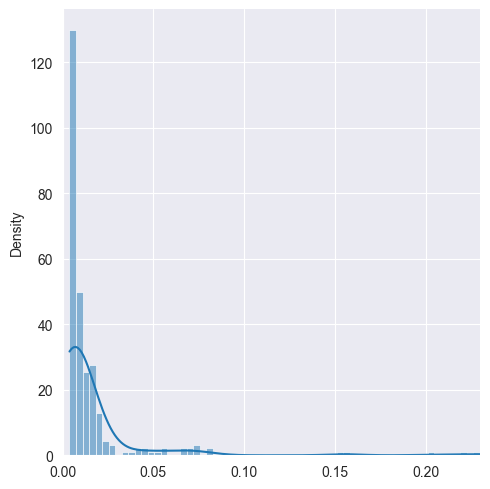

In [148]:
sns.set_style("darkgrid")
sns.displot(list(d.values()),stat='density',kde=True)
#sns.histplot(data=allMadrid, x="PM10",kde=True,bins=100,stat="density",color='blue')

plt.xlim(0, 0.23)

# Andiamo a realizzare la heatmap della degree C.

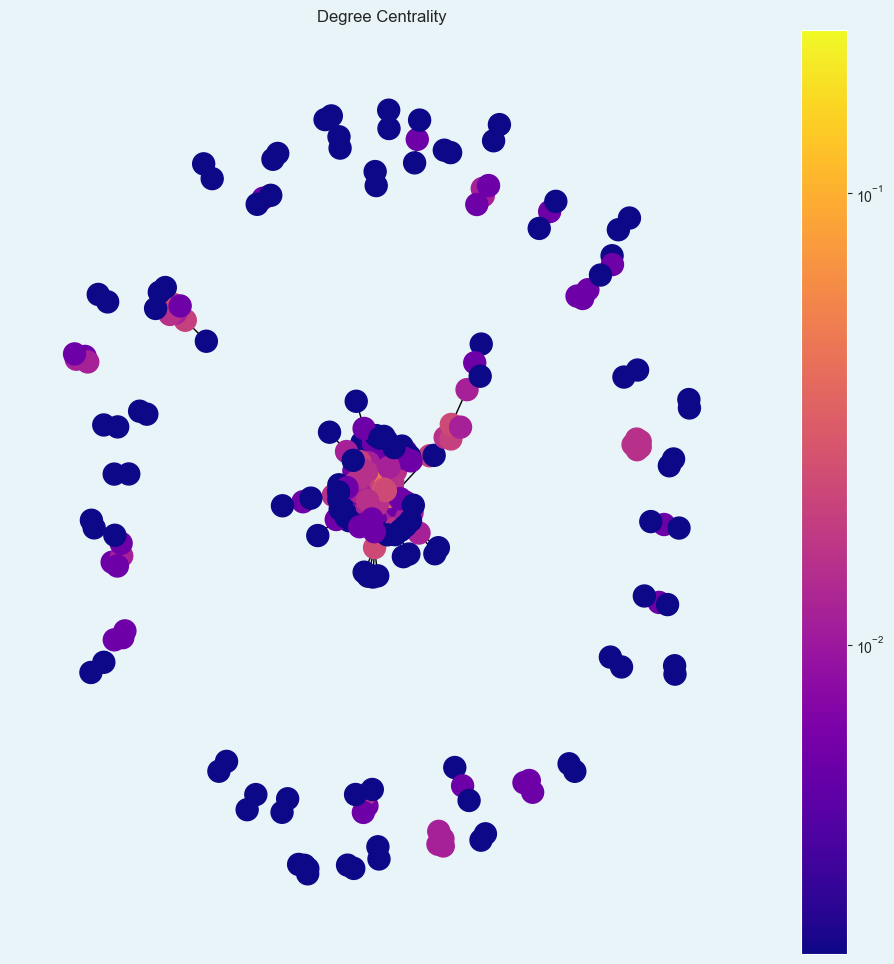

In [149]:
plt.figure(figsize=(12,12),facecolor='#e8f4f8')
pos = nx.spring_layout(graph)
draw(graph, pos, d, 'Degree Centrality')


# Calcolo della closeness centrality

In [150]:
c = nx.closeness_centrality(graph)
print(type(c))

<class 'dict'>


# Stampa dei primi dieci elementi

In [151]:
dict_items = sorted(c.items(), key=lambda x:x[1],reverse=True)

first_ten = list(dict_items)[:10]

#print(my_str)
for i in range(0,10):
    my_str = ': '.join(map(str, first_ten[i]))
    print(str(i+1)+' '+my_str,sep="\n")

1 Rick Sanchez: 0.30600798891334474
2 Morty Smith: 0.29232470485624396
3 Summer Smith: 0.28423666954401583
4 Beth Smith: 0.2683279007262538
5 Jerry Smith: 0.2605502804153479
6 Morty Jr.: 0.2505640327339234
7 Hemorrhage: 0.24797199101598624
8 Space Beth: 0.24711985358981448
9 Jerry Smith (C-131): 0.2462735527213562
10 Naruto Smith: 0.24459822243073476


# Displot delle della misura di centralità

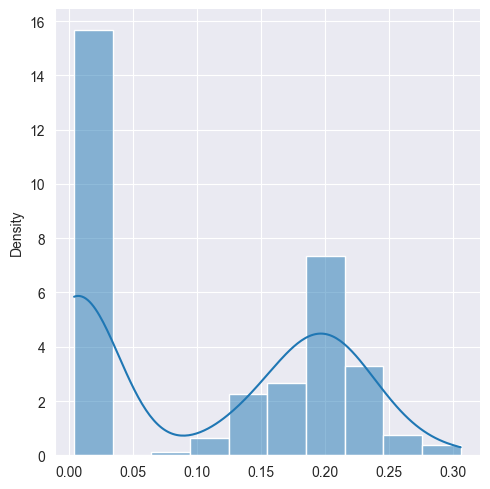

In [152]:
sns.set_style("darkgrid")
sns.displot(list(c.values()),stat='density',kde=True)
#plt.xlim(0, 0.23)

# Heatmap della misura

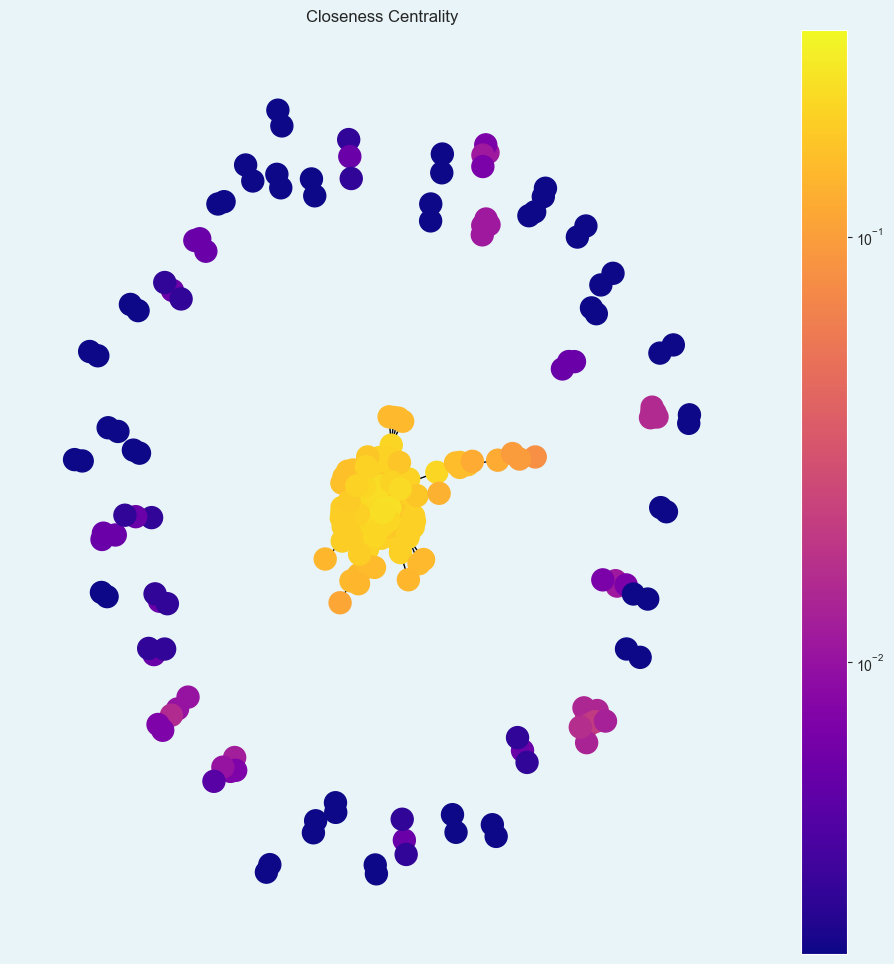

In [153]:
plt.figure(figsize=(12,12),facecolor='#e8f4f8')
pos = nx.spring_layout(graph)
draw(graph, pos, c, 'Closeness Centrality')

# Adesso andiamo a realizzare la misura della eigenvector centrality

In [154]:
e = nx.eigenvector_centrality(graph)

# Andiamo a stampare i 10 nodi più importanti

In [155]:
dict_items = sorted(e.items(), key=lambda x:x[1],reverse=True)

first_ten = list(dict_items)[:10]

#print(my_str)
for i in range(0,10):
    my_str = ': '.join(map(str, first_ten[i]))
    print(str(i+1)+' '+my_str,sep="\n")

1 Summer Smith: 0.3003362881137109
2 Morty Smith: 0.29578066660016405
3 Beth Smith: 0.28020034517224623
4 Rick Sanchez: 0.27187098468209375
5 Jerry Smith: 0.265334780729058
6 Morty Jr.: 0.21167111107564016
7 Hemorrhage: 0.1960894506499813
8 Rick's Father: 0.18210163696500467
9 Jerry Smith (C-131): 0.1819231445403477
10 Joyce Smith: 0.18166348200120544


# Displot della misura di centralità

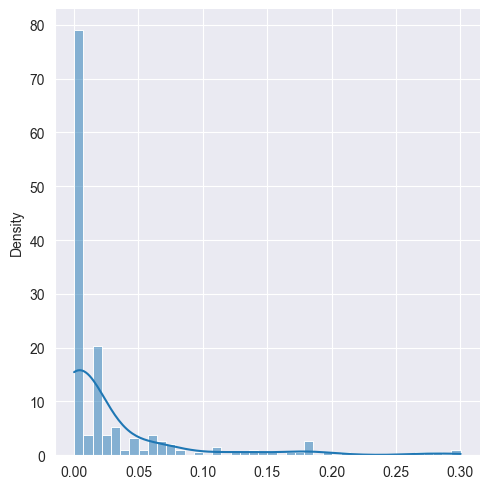

In [156]:
sns.set_style("darkgrid")
sns.displot(list(e.values()),stat='density',kde=True)

# Heatmap della centralità

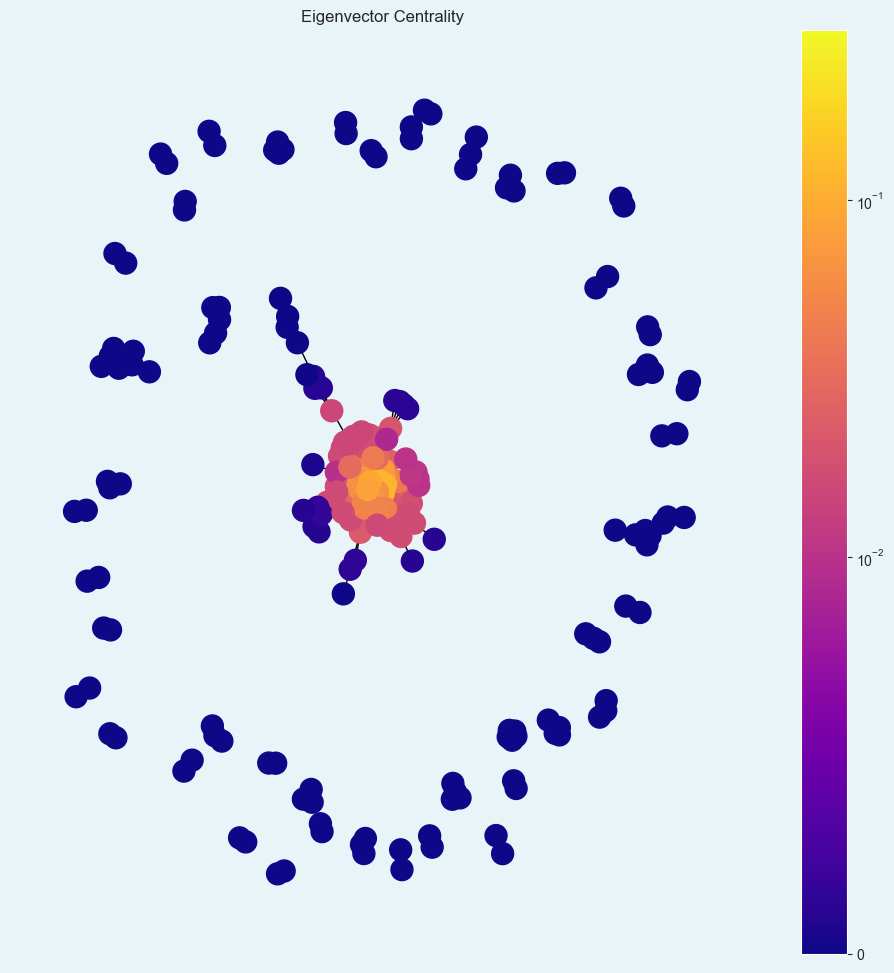

In [157]:
plt.figure(figsize=(12,12),facecolor='#e8f4f8')
pos = nx.spring_layout(graph)
draw(graph, pos, e, 'Eigenvector Centrality')

# Calcolo della betweenness centrality

In [158]:
b = nx.betweenness_centrality(graph)

# Stampiamo i primi dieci risultati

In [159]:
dict_items = sorted(b.items(), key=lambda x:x[1],reverse=True)

first_ten = list(dict_items)[:10]

#print(my_str)
for i in range(0,10):
    my_str = ': '.join(map(str, first_ten[i]))
    print(str(i+1)+' '+my_str,sep="\n")

1 Rick Sanchez: 0.12808106514057074
2 Morty Smith: 0.0741216988142787
3 Summer Smith: 0.06342072620731264
4 Gaia: 0.03395225464190981
5 Reggie: 0.016956479025444515
6 Jerry Smith: 0.01685046470239694
7 Unity: 0.01599441427027633
8 Beth Smith: 0.014966048835369831
9 Joyce Smith: 0.012846063221187325
10 Jessica: 0.01194583619870976


# Studiamo la distribuzione

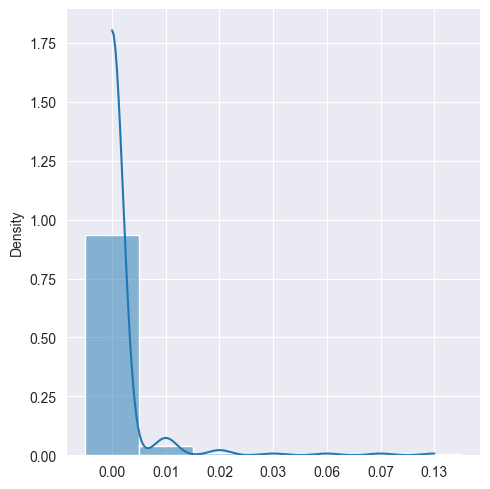

In [160]:
sns.set_style("darkgrid")
test = list(b.values())
test = list(map(lambda x: format(x,'.2f'), test))
sns.displot(sorted(test),stat='density',kde=True)

# Heatmap della misura di centralità

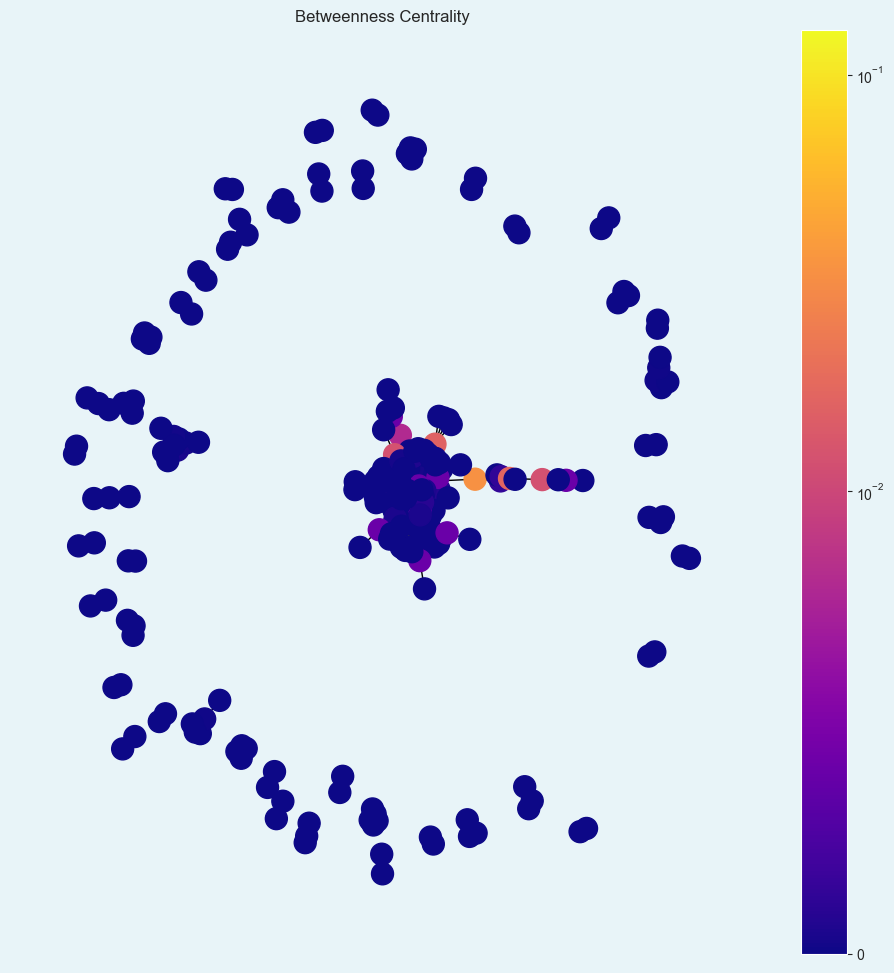

In [162]:
plt.figure(figsize=(12,12),facecolor='#e8f4f8')
pos = nx.spring_layout(graph)
draw(graph, pos, b, 'Betweenness Centrality')